# Matplotlib (Avancé)

Dans ce notebook, nous abordons des sujets plus avancés que vous n'utiliserez généralement pas très souvent. Vous pouvez toujours consulter la documentation pour plus de ressources! 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

#### Échelle logarithmique

Il est également possible de définir une échelle logarithmique pour un ou les deux axes. Cette fonctionnalité n'est en fait qu'une application d'un système de transformation plus général dans Matplotlib. Les échelles de chacun des axes sont réglées séparément à l'aide des méthodes `set_xscale` et `set_yscale` qui acceptent un paramètre (avec la valeur "log" dans ce cas):

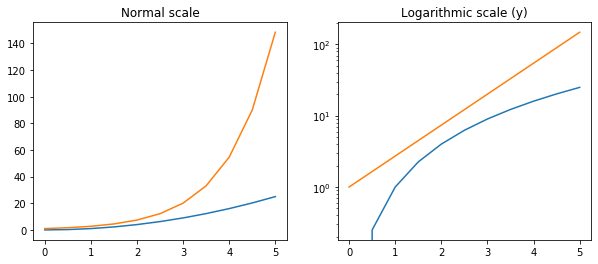

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Emplacement des coches sur l'axes et libellés personnalisés

Nous pouvons déterminer explicitement où nous voulons le coche des axes avec `set_xticks` et `set_yticks`, qui prennent toutes les deux une liste de valeurs pour l'endroit sur l'axe où les coches doivent être placées. Nous pouvons également utiliser les méthodes `set_xticklabels` et `set_yticklabels` pour fournir une liste d'étiquettes de texte personnalisées pour chaque emplacement de coche:

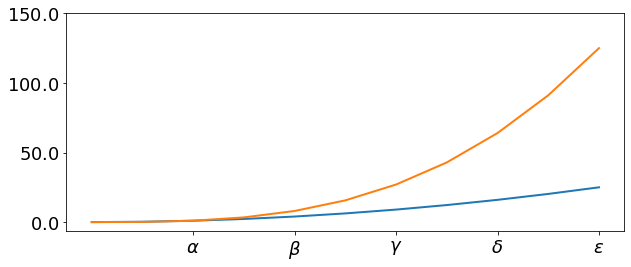

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # utiliser des étiquettes formatées LaTeX

Il existe un certain nombre de méthodes plus avancées pour contrôler le placement des tiques majeures et mineures dans les figures matplotlib, comme le placement automatique en fonction de différentes règles. Voir http://matplotlib.org/api/ticker_api.html pour plus de détails.

#### Notation Scientifique

Avec de grands nombres sur les axes, il est souvent préférable d'utiliser la notation scientifique:

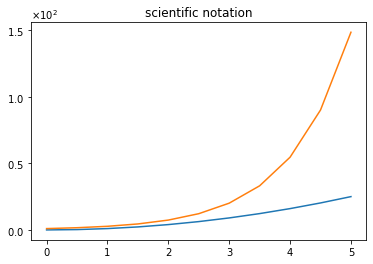

In [21]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### Numéro d'axe et espacement des étiquettes des axes

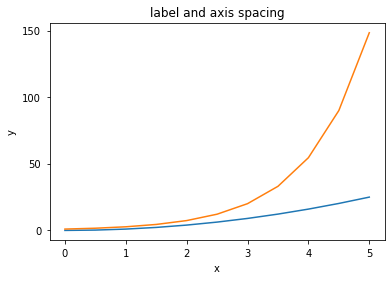

In [23]:
# distance entre les axes x et y et les nombres sur les axes
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# Marge intérieure entre l'étiquette d'axe et les nombres d'axe
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [24]:
# restaurer les valeurs par défaut
plt.rcParams['xtick.major.pad'] = 3
plt.rcParams['ytick.major.pad'] = 3

#### Réglage de la position des axes

Malheureusement, lors de la sauvegarde des chiffres, les étiquettes sont parfois découpées et il peut être nécessaire d'ajuster un peu la position des axes. Ceci peut être fait en utilisant `subplots_adjust`:

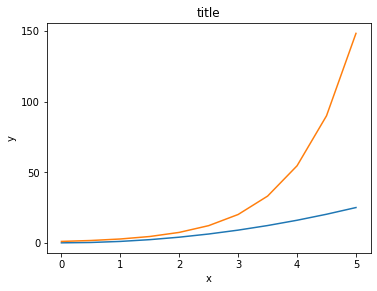

In [25]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Grille des axes

Avec la méthode `grid` dans l'objet axis, on peut activer et désactiver les lignes de grille. Nous pouvons aussi personnaliser l'apparence des lignes de la grille en utilisant les mêmes arguments que pour la fonction `plot`:

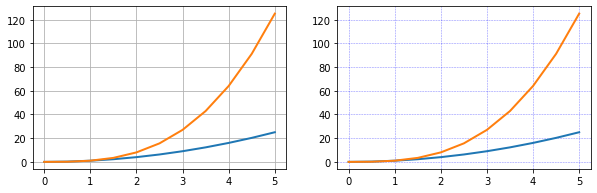

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# apparence par défaut de la grille
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# apparence de grille personnalisée
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Les axes

Nous pouvons également modifier les propriétés de l'axe:

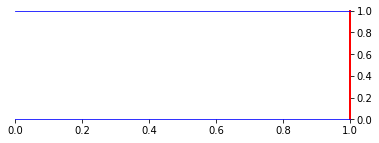

In [36]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['right'].set_color('red')
ax.spines['right'].set_linewidth(2)

# désactiver l'axe gauche
ax.spines['left'].set_color('None')
ax.yaxis.tick_right() # traits seulements sur le côté droit

### 2 axes jumelés

Il est parfois utile d'avoir deux axes x ou y dans une figure, par exemple, pour tracer des courbes avec différentes unités ensemble. Matplotlib supporte ceci avec les fonctions `twinx` et `twiny`:

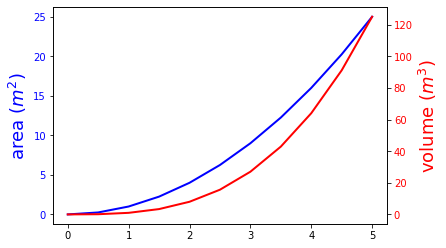

In [37]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes où x et y valent 0

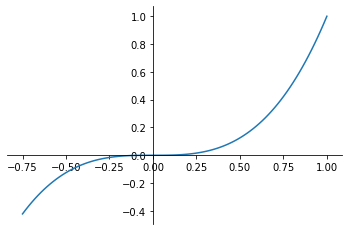

In [38]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # régler la position de x sur 0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # régler la position de y sur 0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Autres styles de tracés 2D

En plus de la méthode classique de `plot`, il existe un certain nombre d'autres fonctions pour générer différents types de tracés. Voir la galerie de tracés matplotlib pour une liste complète des types de tracés disponibles: http://matplotlib.org/gallery.html. Certains des plus utiles sont présentés ci-dessous:

In [39]:
n = np.array([0,1,2,3,4,5])

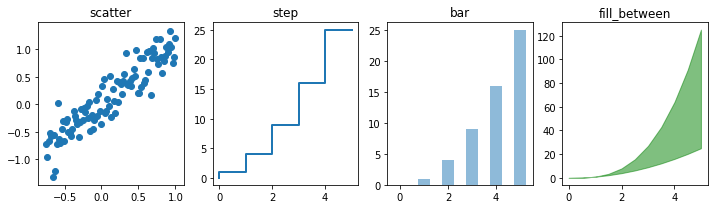

In [40]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

### Annotation de texte

L'annotation de texte dans les figures matplotlib peut se faire à l'aide de la fonction `text`. Il prend en charge le formatage LaTeX tout comme les textes et les titres des étiquettes d'axes:

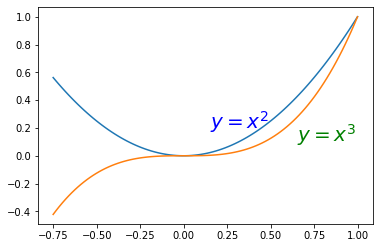

In [41]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Figures avec plusieurs sous-graphiques et incrustations

Les axes peuvent être ajoutés manuellement à une Figure matplotlib en utilisant `fig.add_axes` ou en utilisant un gestionnaire de mise en page dee sous-figures tels que `subplots`, `subplot2grid` ou `gridspec`:

#### subplots

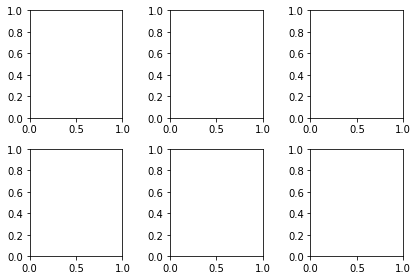

In [42]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

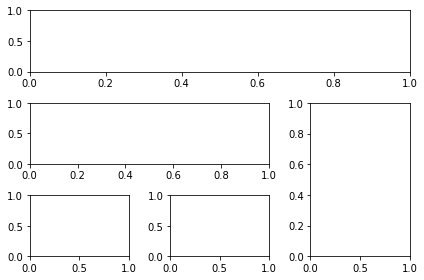

In [43]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [44]:
import matplotlib.gridspec as gridspec

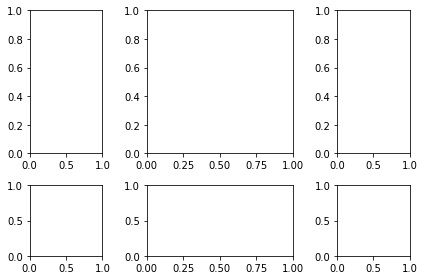

In [45]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

Ajout manuel d'axes avec `add_axes` est utile pour ajouter des graphiques intérieurs aux figures :

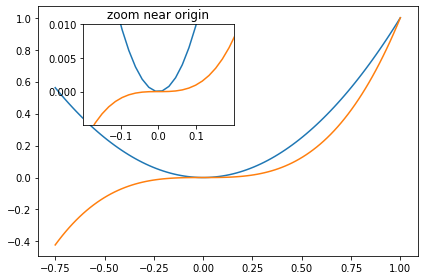

In [46]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# définir plage de l'axe
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# définir les emplacements des tiques d'axe
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Figures de couleurs et de contours

Les couleurs et les figures de contour sont utiles pour tracer les fonctions de deux variables. Dans la plupart de ces fonctions, nous utiliserons une carte de couleurs pour encoder une dimension des données. Il existe un certain nombre de cartes de couleurs prédéfinies. Il est relativement simple de définir des cartes de couleur personnalisées. Pour une liste de cartes de couleurs prédéfinies, voir : http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [47]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [48]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

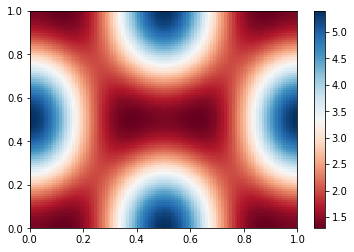

In [50]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

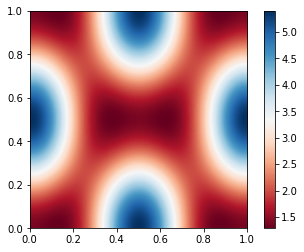

In [51]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

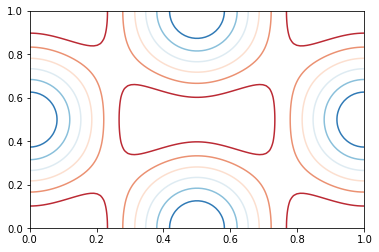

In [52]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## Figures 3D

Pour utiliser les graphiques 3D dans matplotlib, nous devons d'abord créer une instance de la classe `Axes3D`. Les axes 3D peuvent être ajoutés à un canevas de figures matplotlib exactement de la même manière que les axes 2D ; ou, plus commodément, en passant l'argument `projection='3d'` aux méthodes `add_axes` ou `add_subplot`.

In [53]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Tracés de surface

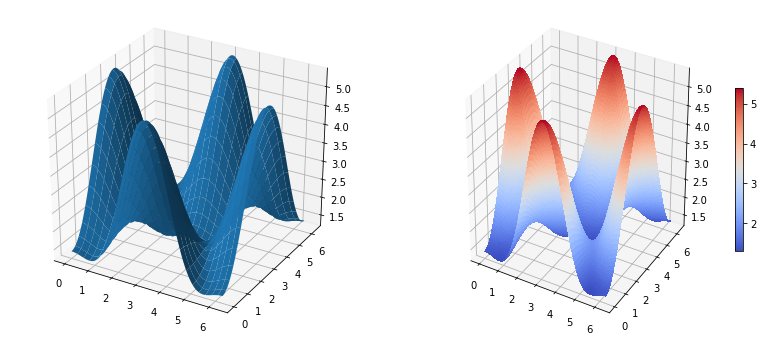

In [55]:
fig = plt.figure(figsize=(14,6))

# `ax` est une instance d'axe compatible 3D à cause de l'argument projection='3d' à add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot avec étalonnage et barre de couleurs
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Tracé Wire-frame

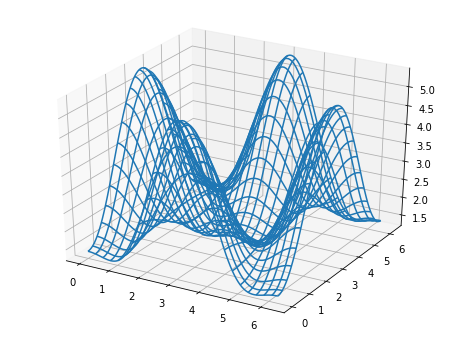

In [56]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### graphiques de Coutour avec projections

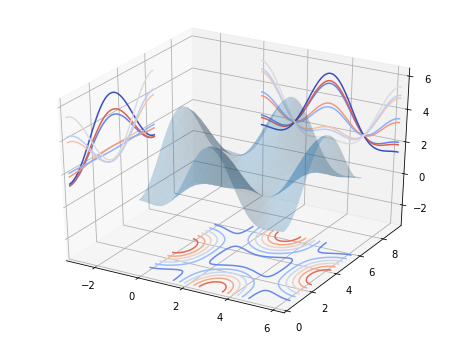

In [58]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=plt.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

## Lectures complémentaires

* http://www.matplotlib.org - La page web du projet matplotlib.
* https://github.com/matplotlib/matplotlib - Le code source de matplotlib.
* http://matplotlib.org/gallery.html - Une grande galerie présentant différents types de tracés que matplotlib peut créer. Fortement recommandé! 
* http://www.loria.fr/~rougier/teaching/matplotlib - Un bon tutoriel matplotlib.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Une autre bonne référence matplotlib.
